<a href="https://colab.research.google.com/github/rominarg/challenge_telecomX/blob/main/telecomX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando Librerías

In [4]:
import pandas as pd
import numpy as np
import requests


url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"
response = requests.get(url)
df = response.json()

In [5]:
df_datos = pd.json_normalize(df, sep='_')

In [6]:
# Vista previa de los datos
df_datos.tail()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65
7266,9995-HOTOH,No,Male,0,Yes,Yes,63,No,No phone service,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Electronic check,59.00,3707.6


Transformacion de datos - Eliminacion de ID

In [7]:
if 'customerID' in df_datos.columns:
    df_datos.drop('customerID', axis=1, inplace=True)

Reemplazar valores vacíos

In [8]:
df_datos.replace(" ", np.nan, inplace=True)

Conversión de datos

In [9]:
df_datos['account_Charges_Total'] = pd.to_numeric(df_datos['account_Charges_Total'], errors='coerce')

Relleno de Valores NO NULOS

In [12]:
df_datos['account_Charges_Total'] = pd.to_numeric(df_datos['account_Charges_Total'], errors='coerce')

Conversión de variables categóricas:

In [13]:
for col in df_datos.select_dtypes(include='object').columns:
    df_datos[col] = df_datos[col].astype('category')

Carga de los datos limpios (ETL - L)

In [14]:
df_datos.to_csv("datos_limpios.csv", index=False)

In [15]:
df_datos.head()

,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [16]:
df_datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Churn                      7267 non-null   category
 1   customer_gender            7267 non-null   category
 2   customer_SeniorCitizen     7267 non-null   int64   
 3   customer_Partner           7267 non-null   category
 4   customer_Dependents        7267 non-null   category
 5   customer_tenure            7267 non-null   int64   
 6   phone_PhoneService         7267 non-null   category
 7   phone_MultipleLines        7267 non-null   category
 8   internet_InternetService   7267 non-null   category
 9   internet_OnlineSecurity    7267 non-null   category
 10  internet_OnlineBackup      7267 non-null   category
 11  internet_DeviceProtection  7267 non-null   category
 12  internet_TechSupport       7267 non-null   category
 13  internet_StreamingTV       7267 n

Análisis Exploratorio

In [17]:
df_datos.describe(include='all')

,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
count,7267,7267,7267.000000,7267,7267,7267.000000,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267.000000,7267.000000
unique,3,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,NaN
top,No,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN
freq,5174,3675,NaN,3749,5086,NaN,6560,3495,3198,3608,3182,3195,3582,2896,2870,4005,4311,2445,NaN,NaN
mean,NaN,NaN,0.162653,NaN,NaN,32.346498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.720098,2279.287581
std,NaN,NaN,0.369074,NaN,NaN,24.571773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.129572,2267.178963
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.425000,401.400000
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.300000,1391.000000
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.875000,3778.525000


Distribución de cancelaciones (Churn)

In [18]:
print(df_datos['Churn'].value_counts(normalize=True))

Churn
No     0.711986
Yes    0.257190
       0.030824
Name: proportion, dtype: float64


Correlación de variables numéricas:

In [19]:
df_datos.corr(numeric_only=True)

,customer_SeniorCitizen,customer_tenure,account_Charges_Monthly,account_Charges_Total
customer_SeniorCitizen,1.000000,0.018187,0.220388,0.103734
customer_tenure,0.018187,1.000000,0.247982,0.824720
account_Charges_Monthly,0.220388,0.247982,1.000000,0.651916
account_Charges_Total,0.103734,0.824720,0.651916,1.000000


Visualización estratégica

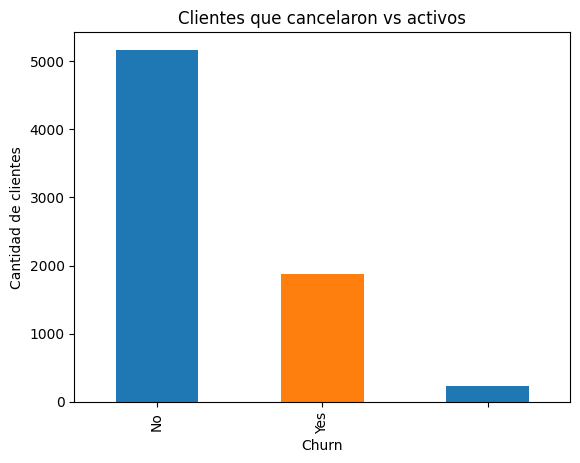

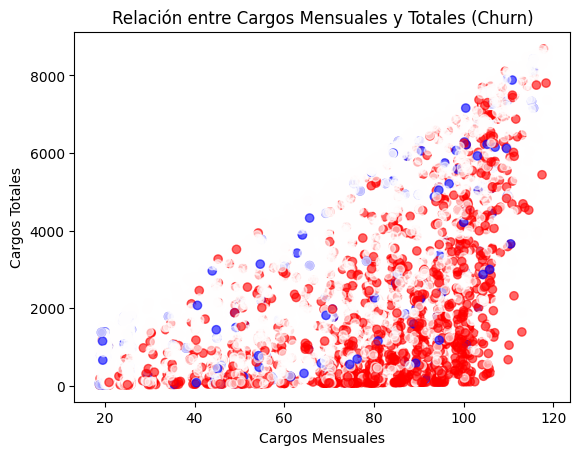

In [22]:
import matplotlib.pyplot as plt

# Gráfico de barras de clientes que cancelaron o no
churn_counts = df_datos['Churn'].value_counts()
churn_counts.plot.bar(color=['#1f77b4', '#ff7f0e'], title='Clientes que cancelaron vs activos')
plt.ylabel('Cantidad de clientes')
plt.show()

# Gráfico de dispersión de cargos mensuales vs totales con colores distintos
# Mapear Churn a 0 y 1
colors = df_datos['Churn'].cat.codes  # o df_datos['Churn'].map({'No':0, 'Yes':1})

plt.scatter(
    df_datos['account_Charges_Monthly'],
    df_datos['account_Charges_Total'],
    c=colors,
    alpha=0.6,
    cmap='bwr'  # blue-red
)
plt.title('Relación entre Cargos Mensuales y Totales (Churn)')
plt.xlabel('Cargos Mensuales')
plt.ylabel('Cargos Totales')
plt.show()

Visualizaciones Avanzadas

/tmp/ipython-input-4260090498.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df_datos, palette=['#2ca02c', '#d62728'])
/tmp/ipython-input-4260090498.py:4: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='Churn', data=df_datos, palette=['#2ca02c', '#d62728'])


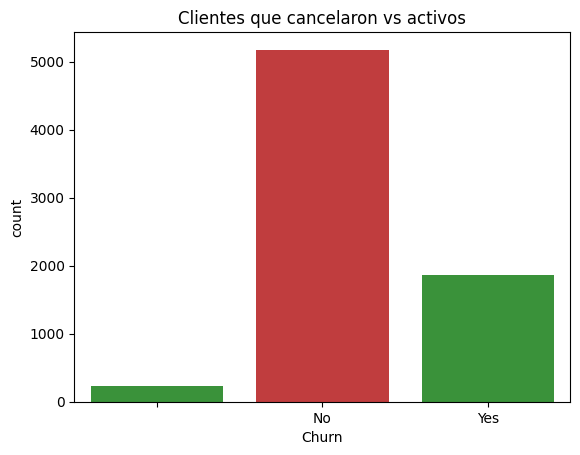

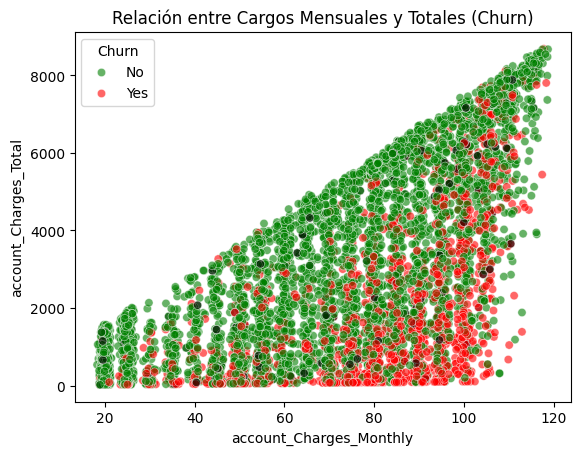

In [23]:
import seaborn as sns

# Gráfico de barras
sns.countplot(x='Churn', data=df_datos, palette=['#2ca02c', '#d62728'])
plt.title('Clientes que cancelaron vs activos')
plt.show()

# Gráfico de dispersión
sns.scatterplot(
    x='account_Charges_Monthly',
    y='account_Charges_Total',
    hue='Churn',
    data=df_datos,
    palette={'No':'green', 'Yes':'red'},
    alpha=0.6
)
plt.title('Relación entre Cargos Mensuales y Totales (Churn)')
plt.show()